In [18]:
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.interpolate import spline

In [45]:
def monte_carlo_pi(n):
    count_in_circle = 0
    for i in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        if x**2 + y**2 <= 1:
            count_in_circle += 1
    
    return 4 * (count_in_circle) / n

In [46]:
def increment(key, dist):
    current_value = dist.get(key, 0)
    dist[key] = current_value + 1

In [54]:
def get_raw_pi_data(trials, samples):
    dist_samples = {}
    for i in range(trials):
        pi = monte_carlo(samples)
        pi_round = round(pi, 2)
        increment(pi_round, dist_samples)
    
    return dist_samples

The function `get_raw_pi_data()` calculates a probability distribution, formatted as a Python dictionary. The key for that dictionary is the `pi` calculated  by the monte carlo algorithm, and `value / trials` is the probability with which the algorithm calculates _that_ `pi`. The `samples` variable affects how accurate the monte carlo algorithm is.

In [53]:
def get_graphable_values(dist):
    x_labels = list(dist.keys())
    prob_sum = float(sum(dist.values()))
    y_probs = [y/prob_sum for y in dist.values()]
    (x_values, y_values) = zip(*sorted(zip(x_labels, y_probs)))
    x_np = np.array(x_values)
    y_np = np.array(y_values)
    x_smooth = np.sort(np.linspace(2.5, 3.6, 500))
    y_smooth = spline(x_np, y_np, x_smooth)
    y_smooth[y_smooth < 0] = 0
    return (x_smooth, y_smooth)

In `get_graphable_values()`, we clean up the distribution a bit, and create a smooth curve for the distribution. Using it's return value, we can plot the probability distribution as shown below.

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()


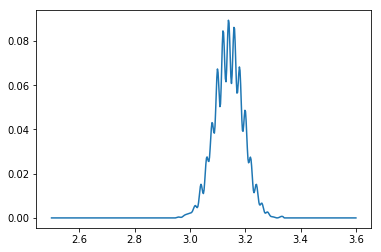

In [65]:
#dist_small_samples = get_raw_pi_data(10000, 1000)
#print(dist_small_samples)
x_points, y_points = get_graphable_values(dist_small_samples)
plt.plot(x_points, y_points)
#plt.show()
plt.savefig("low_samples.png", dpi=200)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # This is added back by InteractiveShellApp.init_path()


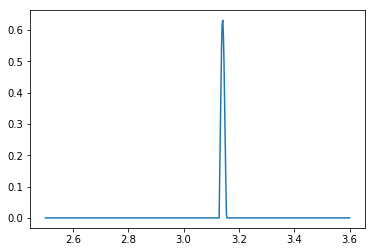

In [64]:
# Beware - the following command takes a lot of time to run.
#dist_many_samples = get_raw_pi_data(10000, 100000)
#print(dist_many_samples)
x_points2, y_points2 = get_graphable_values(dist_many_samples)
plt.plot(x_points2, y_points2)
#plt.show()
plt.savefig("many_samples.png", dpi=200)